In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import cmath
import csv


N = int(input("no. of nodes: "))
step = int(input("no. of time steps: "))
lmd_steps  = int(input("no. of lamda steps:"))

no. of nodes: 50
no. of time steps: 1000
no. of lamda steps:40


[[0 1 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


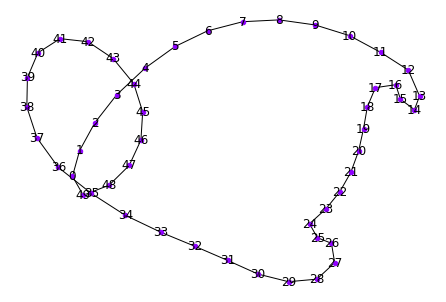

In [2]:
ring_matrix = [[ 0 for j in range(N)] for i in range(N)]
#print(ring_matrix)

for i in range(N-1):
    ring_matrix[i][i+1] = 1
    ring_matrix[i+1][i] = 1
ring_matrix[0][N-1] = 1
ring_matrix[N-1][0] = 1

ring_matrix = np.array(ring_matrix)
print(ring_matrix)


G = nx.from_numpy_matrix(ring_matrix)
nx.draw(G,node_color='#8F00FF',with_labels = True, node_size=20)



G = nx.scale_free_graph(N) #scale free directed network is created
G = G.to_undirected() # changed to undirected graph
G.pos = nx.spring_layout(G) #to give nodes spring like structure
    #nx.draw(G,node_color='#8F00FF', node_size=20) #to draw




In [3]:
def order(theta):
        z = sum(np.exp(theta*1j))/len(theta)
    #    print(np.absolute(z), np.angle(z))
        return np.absolute(z), np.angle(z)

def rk4(t0,y0,xn,n):

        # Calculating step size
        h = (xn-t0)/n

        time_series = []
#        print(n,N)
        for i in range(n):
    #        data = np.zeros(N)
            temp = np.array(y0)

            time_series.append(y0) 
    #        print(time_series)
            for node in G.nodes():

                k1 = h * (f(t0, y0, node, h))
                k2 = h * (f((t0+h/2), (y0+k1/2),node, h))
                k3 = h * (f((t0+h/2), (y0+k2/2),node, h))
                k4 = h * (f((t0+h), (y0+k3),node, h))
                k = (k1+2*k2+2*k3+k4)/6

                yn = y0[node] + k

                temp[node] = yn
                t0 = t0+h
    #            data[node] = yn
            y0 = temp
        return time_series

def f(t0,theta, node,t):
        cpl = 0


        # sigma terms
        for j in range(N):
            cpl += A[node][j]*np.sin(theta[j]-theta[node])*(abs(nextG.nodes[node]['w']-nextG.nodes[j]['w'])**alpha)


        thetadot = nextG.nodes[node]['w'] + (lmd/3)*cpl
        return thetadot


In [4]:
#normal distribution
omega = np.random.normal(loc=1, scale=1, size=(N))
#file1 = open("final1.txt","a")
# open the file in the write mode

#f = open('/home/user1/Desktop/final.csv', 'w')

# create the csv writer
#writer = csv.writer(f)

alpha = 1


for node in G.nodes():
    G.nodes[node]['w'] = omega[node]
    G.nodes[node]['theta'] = np.random.rand()
    G.nodes[node]['thetadot'] = 0


nextG = G.copy() #copy graph

#nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

#extracting adjacency matrix
p = nx.adjacency_matrix(G).toarray()
#print(p)

#changing weighted matrix to unweighted
A = (p>=1).astype(int)
print(A)
lmd0 = 0.01
final_order = []

"""Kuramoto Oscillator function"""
laus = []

for i in tqdm(range(lmd_steps)):
    lmd = lmd0*i
    laus.append(lmd)
    #print(laus)
    print(lmd)
    
    
    
    # Inputs
    t0 = 0
    y0 = np.zeros(N)
    for i in range(N):
        y0[i] = G.nodes[i]['theta']
    xn = 100
    
    

    data = np.array(rk4(t0,y0,xn,step))
    #data = np.array(data)

    

    ordr = []
    angle = []

    st_ep = []
    for i in range(step):
        the_ta = data[i]
        x,y = order(the_ta)
        st_ep.append(i)
        ordr.append(x)
        angle.append(y)


    oreder = order(data[-1])

    final_order.append(oreder)
    print(oreder)


plt.plot(laus,final_order[0:200])
plt.savefig("order2.png")

  0%|          | 0/40 [00:00<?, ?it/s]

[[0 1 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]
0.0


  2%|▎         | 1/40 [01:44<1:08:00, 104.64s/it]

(0.10861953948865338, -1.8651591715647295)
0.01


  5%|▌         | 2/40 [03:19<1:02:39, 98.93s/it] 

(0.1079772289878155, -1.8723989831360732)
0.02


  8%|▊         | 3/40 [05:07<1:03:38, 103.19s/it]

(0.10742444252285974, -1.8855348430068406)
0.03


 10%|█         | 4/40 [06:51<1:02:01, 103.38s/it]

(0.1069945346289804, -1.9045871359395286)
0.04


 12%|█▎        | 5/40 [08:44<1:02:21, 106.90s/it]

(0.10673523879423488, -1.9294249752395989)
0.05


 15%|█▌        | 6/40 [10:20<58:27, 103.16s/it]  

(0.10670646957132654, -1.9597064063514296)
0.06


 18%|█▊        | 7/40 [11:49<54:12, 98.56s/it] 

(0.10697501808830252, -1.994805580962336)
0.07


 20%|██        | 8/40 [13:31<53:04, 99.51s/it]

(0.10760545423354394, -2.033743131357781)
0.08


 20%|██        | 8/40 [13:33<54:13, 101.68s/it]


KeyboardInterrupt: 

In [ ]:

plt.plot(laus,final_order[0:200])
plt.savefig("order2.png")